<a href="https://colab.research.google.com/github/sarkarsachin57/The-Spark-Foundation-Internship-projects/blob/main/TSF_GRIPJUNE21_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation Internship GRIP JUNE 2021**


# **Task 2 : Prediction using Unsupervised ML**

# **By Sachin Sarkar**

**Objective : Predicting the optimum number of clusters and represent it visually.**


---
**Dataset used : https://bit.ly/3kXTdox**

**Algorithm used : KMeans**


.

Importing Python Libraries

In [ ]:
import pandas as pd
import numpy as np

Importing Datasets

In [ ]:
data = pd.read_csv("Iris.csv")

Verifying Dataset

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Understanding Dataset shape

In [ ]:
data.shape

(150, 6)

Checking if there any null cell present in the dataset

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Understanding dataset on statistical point of view

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Preprocessing

In [ ]:
data["Lengthcm"] = (data['PetalLengthCm'] + data['SepalLengthCm'])/2
data["Widthcm"] = (data['PetalWidthCm'] + data['SepalWidthCm'])/2
data = data.drop(["Id","Species","PetalLengthCm","SepalLengthCm","PetalWidthCm","SepalWidthCm"],axis=1)

Checking Dataset after Preprocessing


In [ ]:
data.head()

,Lengthcm,Widthcm
0,3.25,1.85
1,3.15,1.60
2,3.00,1.70
3,3.05,1.65
4,3.20,1.90


Importing Matplotlib.pyplot for Data Visualization

In [ ]:
import matplotlib.pyplot as plt

Data Visualisation using scatterplot

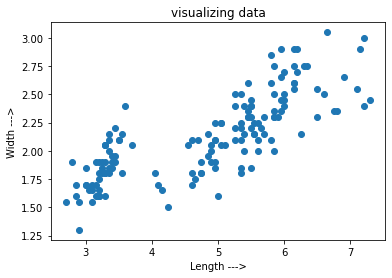

In [ ]:
plt.scatter(x,y)
plt.title("visualizing data")
plt.xlabel("Length --->")
plt.ylabel("Width --->")
plt.show()

Importing KMeans as ML Algorithm

In [ ]:
from sklearn.cluster import KMeans

Elbow method to find optimum value for K

In [ ]:
sse = []
for k in range(1,11):
  model = KMeans(n_clusters=k,random_state=0)
  model.fit(data[['Lengthcm','Widthcm']])
  sse.append(model.inertia_)
sse

[256.30583333333334,
 58.683119212962964,
 27.004694662902466,
 18.376674702380953,
 13.359652286902287,
 10.802423815373817,
 8.779039294039297,
 7.7594382284382295,
 6.95905168621701,
 6.231119182900434]

Ploting Elbow method

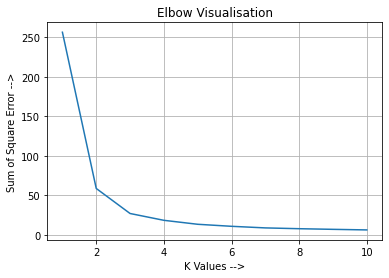

In [ ]:
plt.plot(range(1,11),sse)
plt.title("Elbow Visualisation")
plt.xlabel("K Values -->")
plt.ylabel("Sum of Square Error -->")
plt.grid(True)

Now creating and fiting Model for the founded optimum K value

In [ ]:
model = KMeans(n_clusters=3,random_state=0)
clus_val = model.fit_predict(data[['Lengthcm','Widthcm']])

Knowing model cluster centers

In [ ]:
model.cluster_centers_

array([[3.30185185, 1.81851852],
       [6.29605263, 2.58026316],
       [5.21724138, 2.11551724]])

Inserting cluster array feature to dataset

In [ ]:
data["Cluster"] = clus_val

Checking dataset

In [ ]:
data.head()

,Lengthcm,Widthcm,Cluster
0,3.25,1.85,0
1,3.15,1.60,0
2,3.00,1.70,0
3,3.05,1.65,0
4,3.20,1.90,0


Dividing dataset based on clusters

In [ ]:
df1 = data[data['Cluster']==0]
df2 = data[data['Cluster']==1]
df3 = data[data['Cluster']==2]

Final Data Visualisation after Clustering using KMeans

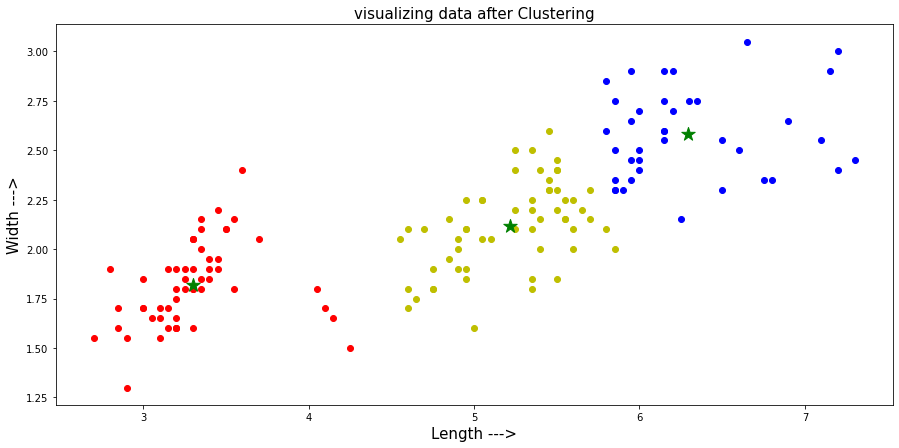

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(df1['Lengthcm'],df1['Widthcm'],c='r',label='Cluster 1')
plt.scatter(df2['Lengthcm'],df2['Widthcm'],c='b',label='Cluster 2')
plt.scatter(df3['Lengthcm'],df3['Widthcm'],c='y',label='cluster 3')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="*",c='g',s=200,label='centroids')
plt.title("visualizing data after Clustering",fontsize=15)
plt.xlabel("Length --->",fontsize=15)
plt.ylabel("Width --->",fontsize=15)
plt.show()

# **Thank You**